In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [95]:
df=pd.read_csv('Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [96]:
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [97]:
from pivottablejs import pivot_ui

In [98]:
pivot_ui(df)

In [99]:
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


# Data preprocess


In [100]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re

In [101]:
stemmer = nltk.stem.porter.PorterStemmer()

In [102]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # stemming
    txt = [stemmer.stem(w) for w in txt]

    return ' '.join(txt)

In [103]:
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))
# drop original text column
df.pop('Resume_str')
df.head()

,Category,Resume
0,HR,hr administr market associ hr administr summar...
1,HR,hr specialist us hr oper summari versatil medi...
2,HR,hr director summari year experi recruit plu ye...
3,HR,hr specialist summari dedic driven dynam year ...
4,HR,hr manag skill highlight hr skill hr depart st...


In [104]:
df.info

<bound method DataFrame.info of       Category                                             Resume
0           HR  hr administr market associ hr administr summar...
1           HR  hr specialist us hr oper summari versatil medi...
2           HR  hr director summari year experi recruit plu ye...
3           HR  hr specialist summari dedic driven dynam year ...
4           HR  hr manag skill highlight hr skill hr depart st...
...        ...                                                ...
2479  AVIATION  rank sgt e non commiss offic charg brigad mail...
2480  AVIATION  govern relat commun organiz develop director p...
2481  AVIATION  geek squad agent profession profil support spe...
2482  AVIATION  program director offic manag summari highli pe...
2483  AVIATION  storekeep ii profession summari purpos documen...

[2484 rows x 2 columns]>

In [105]:
df.Category.value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

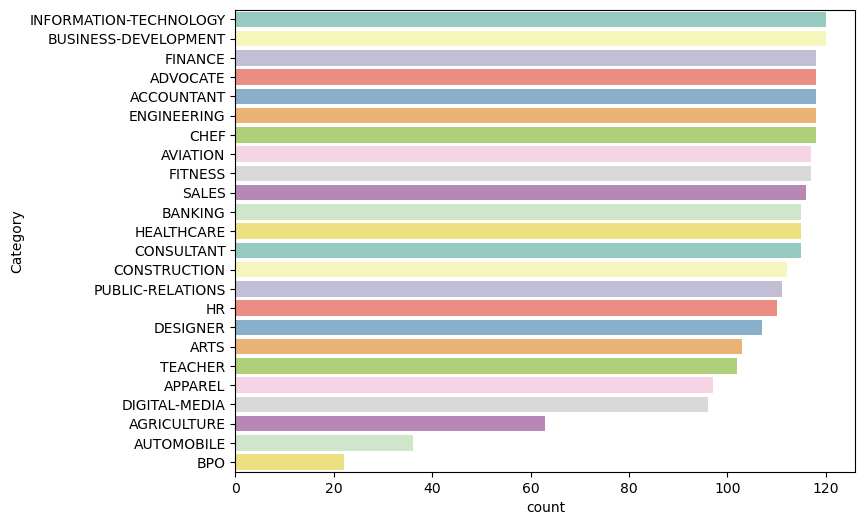

In [106]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index);

In [56]:
df["Resume"][1]

'hr specialist us hr oper summari versatil media profession background commun market human resourc technolog experi current hr specialist us hr oper compani name citi state manag commun regard launch oper group polici chang system outag design standard work job aid creat comprehens train program new employe contractor audit job post old pend hold draft posit audit union hourli non union hourli salari background check drug screen conduct monthli new hire benefit brief new employe across busi unit serv link hr manag vendor handl question resolv system relat issu provid real time process improv feedback key metric initi success brand us hr oper sharepoint site busi unit project manag rfi rfp background check drug screen vendor market commun co op compani name citi state post new articl chang updat corpor sharepoint site includ graphic visual commun research draft articl featur stori promot compani activ program co edit develop content quarterli publish newslett provid commun support inter

In [107]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [108]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

# Removing stopword

In [110]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS

In [111]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words=stopwords.words('english')
len(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [112]:
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [113]:
df['filename'] = df['Resume'].apply(remove_stop_words).astype(str)

In [114]:
df

,Category,Resume,filename
0,HR,hr administr market associ hr administr summar...,"['administr', 'market', 'associ', 'administr',..."
1,HR,hr specialist us hr oper summari versatil medi...,"['specialist', 'oper', 'summari', 'versatil', ..."
2,HR,hr director summari year experi recruit plu ye...,"['director', 'summari', 'year', 'experi', 'rec..."
3,HR,hr specialist summari dedic driven dynam year ...,"['specialist', 'summari', 'dedic', 'driven', '..."
4,HR,hr manag skill highlight hr skill hr depart st...,"['manag', 'skill', 'highlight', 'skill', 'depa..."
...,...,...,...
2479,AVIATION,rank sgt e non commiss offic charg brigad mail...,"['rank', 'commiss', 'offic', 'charg', 'brigad'..."
2480,AVIATION,govern relat commun organiz develop director p...,"['govern', 'relat', 'commun', 'organiz', 'deve..."
2481,AVIATION,geek squad agent profession profil support spe...,"['geek', 'squad', 'agent', 'profession', 'prof..."
2482,AVIATION,program director offic manag summari highli pe...,"['program', 'director', 'offic', 'manag', 'sum..."


# lable Encodding

In [115]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category_labels']=encoder.fit_transform(df.Category)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         2484 non-null   object
 1   Resume           2484 non-null   object
 2   filename         2484 non-null   object
 3   Category_labels  2484 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 68.0+ KB


In [117]:
df

,Category,Resume,filename,Category_labels
0,HR,hr administr market associ hr administr summar...,"['administr', 'market', 'associ', 'administr',...",19
1,HR,hr specialist us hr oper summari versatil medi...,"['specialist', 'oper', 'summari', 'versatil', ...",19
2,HR,hr director summari year experi recruit plu ye...,"['director', 'summari', 'year', 'experi', 'rec...",19
3,HR,hr specialist summari dedic driven dynam year ...,"['specialist', 'summari', 'dedic', 'driven', '...",19
4,HR,hr manag skill highlight hr skill hr depart st...,"['manag', 'skill', 'highlight', 'skill', 'depa...",19
...,...,...,...,...
2479,AVIATION,rank sgt e non commiss offic charg brigad mail...,"['rank', 'commiss', 'offic', 'charg', 'brigad'...",6
2480,AVIATION,govern relat commun organiz develop director p...,"['govern', 'relat', 'commun', 'organiz', 'deve...",6
2481,AVIATION,geek squad agent profession profil support spe...,"['geek', 'squad', 'agent', 'profession', 'prof...",6
2482,AVIATION,program director offic manag summari highli pe...,"['program', 'director', 'offic', 'manag', 'sum...",6


In [118]:
df.drop(columns = ['Category', 'Resume'], inplace = True)
df

,filename,Category_labels
0,"['administr', 'market', 'associ', 'administr',...",19
1,"['specialist', 'oper', 'summari', 'versatil', ...",19
2,"['director', 'summari', 'year', 'experi', 'rec...",19
3,"['specialist', 'summari', 'dedic', 'driven', '...",19
4,"['manag', 'skill', 'highlight', 'skill', 'depa...",19
...,...,...
2479,"['rank', 'commiss', 'offic', 'charg', 'brigad'...",6
2480,"['govern', 'relat', 'commun', 'organiz', 'deve...",6
2481,"['geek', 'squad', 'agent', 'profession', 'prof...",6
2482,"['program', 'director', 'offic', 'manag', 'sum...",6


In [119]:
df.to_csv("C:\\Users\\user\\Desktop\\Deep Learning\\Task file\\categorized_resumes.csv",index=False)

In [120]:
df_update=pd.read_csv("categorized_resumes.csv")
df_update

,filename,Category_labels
0,"['administr', 'market', 'associ', 'administr',...",19
1,"['specialist', 'oper', 'summari', 'versatil', ...",19
2,"['director', 'summari', 'year', 'experi', 'rec...",19
3,"['specialist', 'summari', 'dedic', 'driven', '...",19
4,"['manag', 'skill', 'highlight', 'skill', 'depa...",19
...,...,...
2479,"['rank', 'commiss', 'offic', 'charg', 'brigad'...",6
2480,"['govern', 'relat', 'commun', 'organiz', 'deve...",6
2481,"['geek', 'squad', 'agent', 'profession', 'prof...",6
2482,"['program', 'director', 'offic', 'manag', 'sum...",6


In [121]:
from sklearn.model_selection import train_test_split

In [123]:
text = df["filename"].values
labels = df["Category_labels"].values
text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.25)
print(text_train.shape)
print(y_train.shape)
print(text_test.shape)
print(y_test.shape)

(1863,)
(1863,)
(621,)
(621,)


# Vectorization

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
sublinear_tf=True,
use_idf = True,
stop_words='english',
max_features=1000)

In [126]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape

(1863, 1000)

In [127]:
X_test = word_vectorizer.transform(text_test)
X_test.shape

(621, 1000)

# Multinomial Naive Bayes

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [181]:
clf=MultinomialNB().fit(X_train,y_train)
prediction_Mnb=clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of MultinomialNB Classifier on training set: 0.63
Accuracy of MultinomialNB Classifier on test set: 0.50


In [182]:
from sklearn.metrics import accuracy_score
acuracy=accuracy_score(y_test,prediction_Mnb)
acuracy

0.5024154589371981

In [137]:
prediction_Mnb

array([14, 22, 22,  7,  0, 23, 21, 15, 22, 15, 15, 19, 20, 13, 11, 13, 18,
       21, 16,  7, 21,  1,  6, 13,  1, 15,  7, 18, 15,  0, 20,  0, 22, 20,
        0, 21,  7,  9, 14, 17, 18, 22, 20, 13, 11, 10,  9,  6,  6, 17, 11,
       19, 22, 22, 23,  1, 15,  6, 15,  7, 19,  9, 17, 21,  7, 11, 11, 21,
        9,  0,  0, 19, 17, 10, 16,  7, 15, 23,  0,  6, 22, 16, 20,  1, 10,
       10, 23,  6, 18, 23, 20, 18,  7,  9,  6, 22, 15, 23, 19, 21, 19, 17,
       21, 19,  1, 20, 11, 21,  2,  9,  9, 16, 14, 21,  9, 20, 23, 19, 23,
       15, 23, 18, 22, 21,  0, 16, 21, 21,  7,  6, 16, 22,  7, 19, 10, 11,
        4,  0,  0, 20, 10, 10, 11,  9, 21, 14, 21,  7, 10,  9, 15, 22,  6,
       15, 17, 22, 16, 14,  6,  0, 10, 19, 23, 22, 21, 22, 10, 20, 18,  4,
       19, 23, 22, 21, 18,  6, 23, 22,  6, 22,  0,  9, 22, 20, 17,  9, 20,
       14,  0, 23, 20, 17, 11,  3,  9,  0,  0, 14,  9, 10, 23, 10,  7,  9,
       18, 23,  7, 15,  0,  9, 11, 15,  6, 16, 22, 18, 20,  9,  1,  1,  1,
       19, 19, 10,  1, 12

In [161]:
from sklearn import metrics
metrics_Mnb=metrics.classification_report(y_test, prediction_Mnb)
print(metrics_Mnb)

              precision    recall  f1-score   support

           0       0.46      0.88      0.61        26
           1       0.48      0.41      0.44        29
           2       1.00      0.05      0.09        22
           3       0.80      0.16      0.27        25
           4       0.25      0.04      0.06        28
           5       0.00      0.00      0.00         6
           6       0.89      0.68      0.77        37
           7       0.52      0.65      0.58        26
           8       0.00      0.00      0.00         9
           9       0.55      0.62      0.58        37
          10       0.69      0.77      0.73        26
          11       0.52      0.74      0.61        23
          12       0.10      0.04      0.05        28
          13       0.91      0.42      0.57        24
          14       0.50      0.50      0.50        14
          15       0.69      0.62      0.65        39
          16       0.43      0.30      0.36        33
          17       0.54    

C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

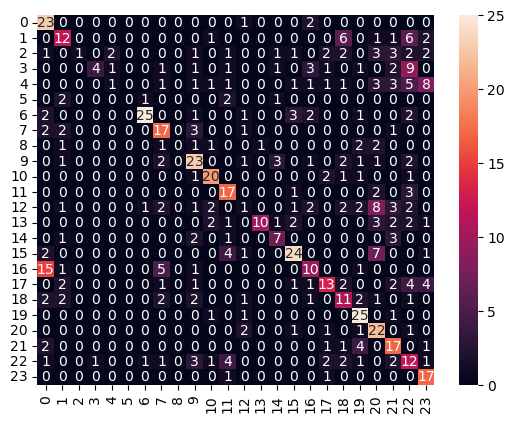

In [162]:
from sklearn.metrics import confusion_matrix
metrics_Mnb=confusion_matrix(y_test,prediction_Mnb)
sns.heatmap(metrics_Mnb,annot=True)

# KNN classifier

In [177]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(X_train, y_train)
prediction_knc = model.predict(X_test)
model.fit(X_train,y_train)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.67
Accuracy of KNeighbors Classifier on test set: 0.48


In [179]:
from sklearn.metrics import accuracy_score
acuracy=accuracy_score(y_test,prediction_knc)
acuracy

0.47987117552334946

In [164]:
metrics_Knc=metrics.classification_report(y_test, prediction_knc)
print(metrics_Knc)

              precision    recall  f1-score   support

           0       0.45      0.88      0.60        26
           1       0.28      0.45      0.34        29
           2       0.30      0.14      0.19        22
           3       0.28      0.32      0.30        25
           4       0.15      0.14      0.15        28
           5       0.00      0.00      0.00         6
           6       0.90      0.76      0.82        37
           7       0.62      0.58      0.60        26
           8       0.00      0.00      0.00         9
           9       0.32      0.70      0.44        37
          10       0.86      0.69      0.77        26
          11       0.61      0.74      0.67        23
          12       0.29      0.21      0.24        28
          13       0.67      0.42      0.51        24
          14       0.57      0.57      0.57        14
          15       0.83      0.51      0.63        39
          16       0.59      0.30      0.40        33
          17       0.77    

C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

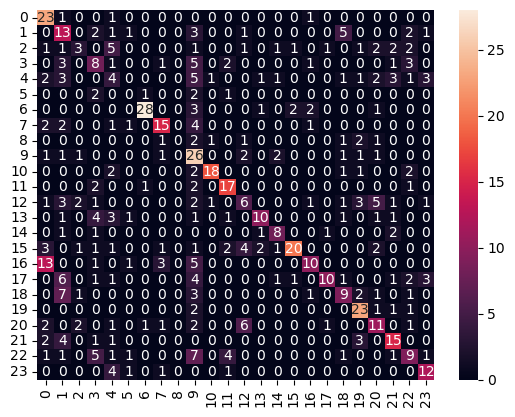

In [165]:
from sklearn.metrics import confusion_matrix
metrics_knc=confusion_matrix(y_test,prediction_knc)
sns.heatmap(metrics_knc,annot=True)

# RandomForestClassifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
RF_Model.fit(X_train,y_train)

C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)

In [167]:
prediction_RF=RF_Model.predict(X_test)
prediction_RF

array([14,  3, 22, 19,  0, 23, 21, 15,  1, 15, 15, 19, 20, 11, 11, 13, 19,
       21,  7, 16, 21, 18,  6, 13,  1, 15, 18, 20, 20,  6, 20,  0, 22, 20,
        0, 21, 21, 18, 14, 23, 12, 22, 12, 13, 22, 10,  9,  6, 22, 17, 11,
       19, 19, 22,  4, 17, 15,  6, 15,  7,  6, 11, 17, 13,  7, 15, 15, 21,
       12,  0,  0, 19, 17, 10, 23, 16, 15, 23,  0,  6,  1,  0, 20,  1, 10,
       10, 23,  6, 23, 23, 20, 18,  7, 18,  6,  6, 13, 23, 19, 21, 19, 22,
       14, 19,  7, 12, 10,  1, 17,  9, 14, 12, 14, 21,  9, 15, 23, 19, 23,
       20, 23, 18,  1, 21,  0, 16, 21, 21, 18,  6, 16, 22,  7, 19, 10, 11,
       10,  0,  0, 20, 10, 10, 11,  9, 21, 14, 23, 17, 22, 12, 15, 14,  6,
       15, 17,  1, 16, 14, 12,  0, 10, 19, 23, 17, 21, 10, 10, 20, 18, 11,
       19, 23, 21, 21, 18,  6, 23, 12,  6, 22,  0,  6, 10, 20, 18,  9, 20,
       14,  0, 23, 15, 19, 11, 19,  9, 18,  0, 14,  9, 10, 23, 10,  7, 16,
       18, 23,  7, 15,  0,  7, 13,  6,  6, 16,  1, 18, 15,  9, 18,  1,  1,
       19, 19, 10, 16, 16

In [168]:
print("training Score: {:.2f}".format(RF_Model.score(X_train, y_train)))
print("test Score: {:.2f}".format(RF_Model.score(X_test, y_test)))

training Score: 0.88
test Score: 0.60


In [170]:
from sklearn.metrics import accuracy_score
acuracy=accuracy_score(y_test,prediction_RF)
acuracy

0.5990338164251208

In [169]:
metrics_RF=metrics.classification_report(y_test, prediction_RF)
print(metrics_RF)

              precision    recall  f1-score   support

           0       0.51      0.96      0.67        26
           1       0.88      0.79      0.84        29
           2       0.00      0.00      0.00        22
           3       0.33      0.04      0.07        25
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00         6
           6       0.85      0.95      0.90        37
           7       0.69      0.77      0.73        26
           8       0.00      0.00      0.00         9
           9       0.86      0.49      0.62        37
          10       0.60      0.92      0.73        26
          11       0.64      0.91      0.75        23
          12       0.75      0.32      0.45        28
          13       0.70      0.58      0.64        24
          14       0.50      0.71      0.59        14
          15       0.73      0.69      0.71        39
          16       0.57      0.36      0.44        33
          17       0.68    

C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

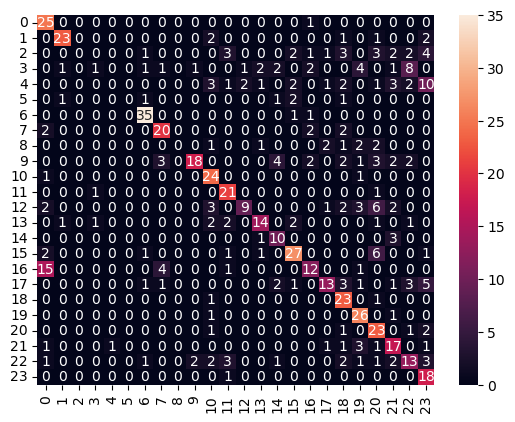

In [171]:
from sklearn.metrics import confusion_matrix
metrics_RF=confusion_matrix(y_test,prediction_RF)
sns.heatmap(metrics_RF,annot=True)

# XGBOOST

In [146]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [148]:
prediction_xgb=model_xgb.predict(X_test)
prediction_xgb

array([ 9,  3, 22, 12, 19,  4, 21, 15,  1, 15, 15, 19, 20, 11, 11, 13,  3,
       21,  7,  5, 21, 18,  6, 13,  1, 15, 18,  9, 20,  6, 12, 16, 22, 20,
        0, 21, 21,  9,  9, 23, 12,  3, 12, 13, 22, 13,  9,  6, 22, 17, 11,
       10, 22, 22,  4, 17, 15,  6, 15,  7,  6,  9, 17, 14,  7, 15, 15, 21,
       13,  0,  0, 19, 17, 10, 23, 16, 15, 23,  0,  6,  1,  0, 11,  1, 10,
       10, 23,  6, 23, 23, 20, 18,  7,  9,  6,  6, 13, 23, 19, 21, 19, 17,
       22, 19,  7, 12, 10,  1,  2,  9, 14, 12, 14, 22,  9, 15, 23, 19, 23,
       12, 23, 18,  1, 21,  0, 16, 21, 21,  7,  6, 16,  4, 20, 19, 10, 11,
       10,  0,  0, 20, 10, 10, 11,  9, 21, 14, 21,  7, 22,  9, 15, 14, 15,
       15, 17,  1, 16, 14, 17, 16, 10, 19, 23,  3, 21, 10, 10, 20, 18, 20,
       19, 23, 22, 21, 18,  6, 23, 12,  6, 22,  0,  9, 22, 20, 18,  9, 15,
       14, 16, 23, 13, 12, 11,  3,  9, 18, 19,  3,  9, 10, 17, 10,  7, 22,
       21, 17,  7, 13,  0,  7,  3,  6,  6, 16,  1,  8, 15, 12,  7,  1,  1,
       19, 19, 10, 16,  9

In [150]:
from sklearn.metrics import accuracy_score
acuracy=accuracy_score(y_test,prediction_xgb)
acuracy

0.644122383252818

In [151]:
import seaborn as sns 

<AxesSubplot:>

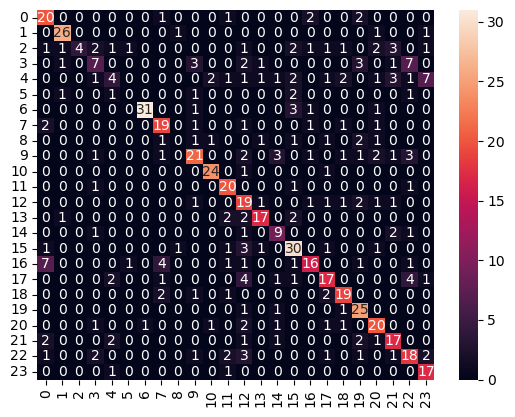

In [153]:
from sklearn.metrics import confusion_matrix
metrics_xgb=confusion_matrix(y_test,prediction_xgb)
sns.heatmap(metrics_xgb,annot=True)